In [21]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv
/kaggle/input/hategold/en_a.tsv
/kaggle/input/hatedetectionenglish/test.tsv
/kaggle/input/hatedetectionenglish/dev.tsv
/kaggle/input/hatedetectionenglish/dev_en.tsv
/kaggle/input/hatedetectionenglish/train.tsv
/kaggle/input/hatedetectionenglish/sarcasm-dataset.txt
/kaggle/input/hatedetectionenglish/test_en.tsv
/kaggle/input/hatedetectionenglish/train_en.tsv


In [22]:
!pip install pandas
!pip install emoji

In [23]:
import pandas as pd

hateEval = pd.read_csv('/kaggle/input/hatedetectionenglish/train_en.tsv', delimiter='\t')
hateEval

,id,text,HS,TR,AG
0,201,"Hurray, saving us $$$ in so many ways @potus @...",1,0,0
1,202,Why would young fighting age men be the vast m...,1,0,0
2,203,@KamalaHarris Illegals Dump their Kids at the ...,1,0,0
3,204,NY Times: 'Nearly All White' States Pose 'an A...,0,0,0
4,205,Orban in Brussels: European leaders are ignori...,0,0,0
...,...,...,...,...,...
8995,9196,@mmdwriter @JRubinBlogger @BenSasse I am proud...,0,0,0
8996,9197,@CheriJacobus Hollywood is complicit in the ra...,0,0,0
8997,9198,@amaziah_filani What a fucking cunt I hate see...,1,1,1
8998,9199,Hysterical woman like @CoryBooker,0,0,0


In [24]:
hateEval_data = hateEval['text']
print(hateEval_data[0])

Hurray, saving us $$$ in so many ways @potus @realDonaldTrump #LockThemUp #BuildTheWall #EndDACA #BoycottNFL #BoycottNike


In [25]:
#PRE PROCESSING

import re
import emoji
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

def pre_process(text):

    text = text.replace('\n', '')
    text = text.replace('\t', '')
    text = text.replace('\s', '')
    text = re.sub(r'https?://\S+|www\.\S+', 'url', text) # to remove url
    text = re.sub(r'\S+@\S+', 'email', text) # to remove email
    text = re.sub(r'@\S+', 'user', text) # to remove user
    text = re.sub(r'\d+%', 'percentage', text) # to remove percentange
    text = re.sub(r'\$\d+(\.\d+)?', 'money', text) # to remove money
    text = re.sub(r'\d+/\d+/\d+', 'date', text) # to remove dates
    text = re.sub(r'\d+:\d+', 'time', text) # to put time in the place of time
    text = re.sub(r'\d{3}-\d{3}-\d{4}', 'phone', text) # phone number
    text = re.sub(r'#(\S+)', lambda x: ' '.join(re.findall(r'[A-Z]?[a-z]+', x.group())), text)# to remove hashtags
    text = re.sub(r'\b(\w+?)\1{2,}\b', r'\1', text) # to remove elongated words
    text = emoji.demojize(text) # to remove emojies
    text = text.lower() # to convert into lower case

    stop_words = set(stopwords.words('english'))
    words = text.split(" ")
    final_words = [word for word in words if word not in stop_words]
    final_sen = ' '.join(final_words)

    return final_sen

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
processed_data = pre_process(hateEval_data[0])
print(hateEval_data[0])
print(processed_data)

Hurray, saving us $$$ in so many ways @potus @realDonaldTrump #LockThemUp #BuildTheWall #EndDACA #BoycottNFL #BoycottNike
hurray, saving us $$$ many ways user user lock build wall end boycott boycott nike


In [27]:
DATASET_COLUMNS = ["target", "ids", "date", "flag", "user", "text"]
DATASET_ENCODING = "ISO-8859-1"

hateEval_train = pd.read_csv('/kaggle/input/hatedetectionenglish/train_en.tsv', delimiter='\t')
hateEval_dev = pd.read_csv('/kaggle/input/hatedetectionenglish/dev_en.tsv', delimiter='\t')

# senti_train = pd.read_csv('/kaggle/input/hatedetectionenglish/train.tsv', delimiter='\t')
# senti_dev = pd.read_csv('/kaggle/input/hatedetectionenglish/dev.tsv', delimiter='\t')
# senti_test = pd.read_csv('/kaggle/input/hatedetectionenglish/test.tsv', delimiter='\t')

# polarity_train = pd.read_csv('/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv', encoding =DATASET_ENCODING , names=DATASET_COLUMNS)
# polarity_dev = pd.read_csv('/kaggle/input/hatedetectionenglish/train_en.tsv', delimiter='\t')
# polarity_test = pd.read_csv('/kaggle/input/hatedetectionenglish/train_en.tsv', delimiter='\t')

In [28]:
print(hateEval_train.columns)
# print(senti_train.columns)
# print(polarity_train.columns)

Index(['id', 'text', 'HS', 'TR', 'AG'], dtype='object')


In [29]:
hateEval_train['pre_process'] = hateEval_train['text'].apply(pre_process)
# print("hi")
# senti_train['pre_process'] = senti_train['tweet'].apply(pre_process)
# print("hlo")
# polarity_train['pre_process'] = polarity_train['text'].apply(pre_process)

In [30]:
from transformers import BertTokenizer, BertModel
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bertModel = BertModel.from_pretrained("bert-base-uncased")

print(model)
print(tokenizer)

BaseModel(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=

In [31]:
import torch.nn as nn
import torch
import torch.optim as optim

In [32]:
hateEval_data = list(hateEval_train['pre_process'])
hateEval_labels = list(hateEval_train['HS'])
print(hateEval_data[:5])
print(hateEval_labels[:5])

['hurray, saving us $$$ many ways user user lock build wall end boycott boycott nike', "would young fighting age men vast majority ones escaping war &amp; cannot fight like women, children, elderly?it's majority refugees actually refugees economic migrants trying get europe.... url", 'user illegals dump kids border like road kill refuse unite! hope get amnesty, free education welfare illegal familes belong together country taxpayer dime scam amnesty send', "ny times: 'nearly white' states pose 'an array problems' immigrants url url", 'orban brussels: european leaders ignoring people, want migrants url']
[1, 1, 1, 0, 0]


In [33]:
output = tokenizer(hateEval_data[0],  max_length = 80,  padding='max_length', truncation=True, return_tensors='pt')
print(output.keys)

<bound method BatchEncoding.keys of {'input_ids': tensor([[  101, 15876, 11335,  2100,  1010,  7494,  2149,  1002,  1002,  1002,
          2116,  3971,  5310,  5310,  5843,  3857,  2813,  2203, 17757, 17757,
         18368,   102,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': 

In [34]:
from torch.utils.data import Dataset, DataLoader

BatchSize = 8
class baseModelData(Dataset):
    def __init__(self, tweets, hateLabel):
        self.tweets = tweets
        self.hateLabel = hateLabel
    
    def __len__(self):
        return len(self.tweets)
    
    def __getitem__(self, ind):
        output = tokenizer(self.tweets[ind],  max_length = 80,  padding='max_length', truncation=True, return_tensors='pt')
        input_ids = output['input_ids'][0]
        attention_mask = output['attention_mask'][0]
        
        my_tensor = torch.zeros(2)
        my_tensor[self.hateLabel[ind]] = 1
        
        return input_ids, attention_mask, my_tensor


hateEval_dataSet = baseModelData(hateEval_data, hateEval_labels)
hateEval_load = DataLoader(hateEval_dataSet, BatchSize, shuffle=True)

In [35]:
for ids, masks, label in hateEval_load:
    print(ids.shape, masks.shape, label.shape)
    print(ids, masks, label)
    break

torch.Size([8, 80]) torch.Size([8, 80]) torch.Size([8, 2])
tensor([[  101,  2308,  7743,  2229,  1012,  1015,  2051,  1010,  7743, 28352,
          2356,  6039,  3020, 21605,  5093,  2223,  1012,  1012,  1012,  1045,
          1004,  2180,  1010,  1000,  5068,  1000,  1012,  1012,  1012,   102,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0],
        [  101,  7078, 17082,  2270,  2740,  3233,  8400,  2228,  3616,  4268,
         13417,  5573, 15330,  8745,  1010,  2758,  1012, 24471,  2140, 24471,
          2140,   102,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,

In [36]:
class BaseModel(nn.Module):
    def __init__(self, d_model, hidden_dim, output_dim, drop_prob = 0.1):
        super().__init__()
        self.bert = BertModel.from_pretrained("bert-base-uncased")
        
        self.linear1 = nn.Linear(d_model, hidden_dim)
        self.relu = nn.ReLU()
        self.dropout1 = nn.Dropout(drop_prob)
        
        self.linear2 = nn.Linear(hidden_dim, hidden_dim)
        self.dropout2 = nn.Dropout(drop_prob)
        
        self.linear3 = nn.Linear(hidden_dim, output_dim)
    
    
    def forward(self, input_ids, masks):
        # inputs_ids, masks : [32, 80]
        
        output = self.bert(input_ids, masks) #[32, 80, 768]
        output = output['last_hidden_state']
        cls = output[:,0,:] # [32 x 768]
        
        y = self.linear1(cls) # [32, hidden_dim]
        y = self.relu(y)
        y = self.dropout1(y)
        
        y = self.linear2(y) # [32, hidden_dim]
        y = self.relu(y)
        y = self.dropout2(y)
        
        y = self.linear3(y)
        
        return y # 
       

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BaseModel(768, 200, 2)
model = model.to(device)
criterion = nn.BCELoss()
cross_criterion = nn.CrossEntropyLoss()
optimizer = optim.NAdam(model.parameters(), lr=1e-5, weight_decay=0.01)

In [37]:
#evalution data
# preparing evalutaion dataset
data = list(hateEval_dev['text'])
label = list(hateEval_dev['HS'])
dev_data = []
dev_label = []
for i, x in enumerate(data):
    if len(dev_data) > 32:
        break
    elif isinstance(x, str):
        dev_data.append(pre_process(x))
        dev_label.append(label[i])
    
hateEval_dev_dataset = baseModelData(dev_data, dev_label)
hateEval_dev_load = DataLoader(hateEval_dev_dataset, len(dev_data))

In [38]:
!pip install torcheval-nightly

In [39]:
top_layers = ['encoder.layer.10.', 'encoder.layer.11.', 'pooler.']
named_parameters = dict(bertModel.named_parameters())

In [40]:
import torcheval
from torcheval.metrics import MulticlassAccuracy, MulticlassF1Score, MulticlassConfusionMatrix

hate_accuracy = torcheval.metrics.MulticlassAccuracy(num_classes = 2 , device = device)
hate_f1Score = torcheval.metrics.MulticlassF1Score(num_classes = 2, device = device)
hate_confusion_matrix = torcheval.metrics.MulticlassConfusionMatrix(num_classes = 2, device = device)

hate_accuracy_dev = torcheval.metrics.MulticlassAccuracy(num_classes = 2 , device = device)
hate_f1Score_dev = torcheval.metrics.MulticlassF1Score(num_classes = 2, device = device, average = 'macro')
hate_confusion_matrix_dev = torcheval.metrics.MulticlassConfusionMatrix(num_classes = 2, device = device)

EPOCHS = 3
lossPerEpoch = []



for i in range(EPOCHS):
    lossList = []
    
    model.train()
    if i < 2:
            for param in model.bert.parameters():
                param.requires_grad = False
    elif i == 2:
          for name, param in named_parameters.items():
                if any(layer_name in name for layer_name in top_layers):
                    param.requires_grad = False
                
    for i, (input_ids, masks, label) in enumerate(hateEval_load):
            input_ids, masks = input_ids.to(device), masks.to(device)
            output = model.forward(input_ids, masks)
            predictions = torch.argmax(output, dim=1)
            label_ground = torch.argmax(label, dim=1)
            output, label = output.to(device), label.to(device)

            predictions, label_ground = predictions.to(device), label_ground.to(device)
            print(predictions, label_ground)
            hate_accuracy.update(predictions, label_ground)
            hate_f1Score.update(predictions, label_ground)
            hate_confusion_matrix.update(predictions, label_ground)
            
            loss = cross_criterion(output, label)
            lossList.append(loss)
            print(loss, 2)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
    
    model.eval()
    for i, (input_ids, masks, labels) in enumerate(hateEval_dev_load):
            input_ids, masks  = input_ids.to(device), masks.to(device) 
            output = model.forward(input_ids, masks)
            predictions = torch.argmax(output, dim=1)
            label_ground = torch.argmax(labels, dim=1)
            print(predictions, label_ground)
            output, label = output.to(device), labels.to(device)

            predictions, label_ground = predictions.to(device), label_ground.to(device)
            hate_accuracy_dev.update(predictions, label_ground)
            hate_f1Score_dev.update(predictions, label_ground)
            hate_confusion_matrix_dev.update(predictions, label_ground)
    
    accuracy = hate_accuracy.compute()
    f1_score = hate_f1Score.compute()
    confusion_matrix = hate_confusion_matrix.compute()
    
    accuracy_dev = hate_accuracy_dev.compute()
    f1_score_dev = hate_f1Score_dev.compute()
    confusion_matrix_dev =  hate_confusion_matrix_dev.compute()
    
    hate_accuracy.reset()
    hate_f1Score.reset()
    hate_confusion_matrix.reset()
    
    hate_accuracy_dev.reset()
    hate_f1Score_dev.reset()
    hate_confusion_matrix_dev.reset()
    
    lossPerEpoch.append(sum(lossList)/len(lossList))
        
    print(accuracy, f1_score, confusion_matrix)
    print(accuracy_dev, f1_score_dev, confusion_matrix_dev)
    print("------------------------------------------------------------------------------------------------")
        
   

tensor([0, 0, 1, 0, 1, 0, 0, 0], device='cuda:0') tensor([0, 1, 0, 1, 1, 1, 0, 0], device='cuda:0')
tensor(0.6951, device='cuda:0', grad_fn=<DivBackward1>) 2
tensor([0, 0, 1, 0, 0, 0, 0, 0], device='cuda:0') tensor([1, 1, 1, 1, 1, 0, 1, 0], device='cuda:0')
tensor(0.7033, device='cuda:0', grad_fn=<DivBackward1>) 2
tensor([0, 0, 0, 1, 0, 0, 0, 0], device='cuda:0') tensor([0, 0, 1, 1, 0, 0, 1, 0], device='cuda:0')
tensor(0.6850, device='cuda:0', grad_fn=<DivBackward1>) 2
tensor([0, 1, 0, 0, 1, 0, 0, 0], device='cuda:0') tensor([0, 1, 0, 0, 0, 0, 0, 0], device='cuda:0')
tensor(0.6775, device='cuda:0', grad_fn=<DivBackward1>) 2
tensor([1, 1, 0, 0, 1, 1, 0, 0], device='cuda:0') tensor([0, 0, 0, 1, 1, 1, 0, 0], device='cuda:0')
tensor(0.6797, device='cuda:0', grad_fn=<DivBackward1>) 2
tensor([0, 1, 0, 0, 0, 1, 0, 1], device='cuda:0') tensor([1, 0, 0, 0, 0, 1, 0, 1], device='cuda:0')
tensor(0.6859, device='cuda:0', grad_fn=<DivBackward1>) 2
tensor([0, 0, 0, 0, 1, 0, 1, 1], device='cuda:0') te

In [41]:
hateEval_test = pd.read_csv('/kaggle/input/hatedetectionenglish/test_en.tsv', delimiter='\t')
hateEval_label = pd.read_csv('/kaggle/input/hategold/en_a.tsv', delimiter='\t',  header=None)


hateEval_test['pre_process'] = hateEval_test['text'].apply(pre_process)

hateEval_dataSet = baseModelData(hateEval_test['pre_process'], hateEval_label[1])
hateEval_load = DataLoader(hateEval_dataSet, BatchSize)

accuracy_hate = torcheval.metrics.MulticlassAccuracy(num_classes = 2 , device = device)
f1Score_hate = torcheval.metrics.MulticlassF1Score(num_classes = 2, device = device)
confusion_matrix_hate = torcheval.metrics.MulticlassConfusionMatrix(num_classes = 2, device = device)


model.eval()
for i, (input_ids, masks, label) in enumerate(hateEval_load):
        input_ids, masks = input_ids.to(device), masks.to(device)
        output = model.forward(input_ids, masks)
        predictions = torch.argmax(output, dim=1)
        label_ground = torch.argmax(label, dim=1)
        output, label = output.to(device), label.to(device)

        predictions, label_ground = predictions.to(device), label_ground.to(device)
        print(predictions, label_ground)
        accuracy_hate.update(predictions, label_ground)
        f1Score_hate.update(predictions, label_ground)
        confusion_matrix_hate.update(predictions, label_ground)
        
        
accuracy_hate = accuracy_hate.compute()
f1_score_hate = f1Score_hate.compute()
confusion_matrix_test =  confusion_matrix_hate.compute()
    
# accuracy_hate.reset()
# f1Score_hate.reset()
# confusion_matrix_hate.reset()
print(accuracy_hate, f1_score_hate, confusion_matrix_test)
    

tensor([0, 0, 0, 0, 1, 0, 1, 1], device='cuda:0') tensor([1, 1, 1, 1, 1, 1, 0, 1], device='cuda:0')
tensor([0, 1, 1, 1, 0, 1, 0, 0], device='cuda:0') tensor([1, 1, 1, 0, 0, 1, 1, 1], device='cuda:0')
tensor([1, 1, 1, 1, 1, 1, 0, 1], device='cuda:0') tensor([1, 1, 1, 1, 0, 1, 1, 1], device='cuda:0')
tensor([1, 1, 1, 1, 1, 1, 1, 0], device='cuda:0') tensor([1, 1, 1, 0, 1, 1, 1, 0], device='cuda:0')
tensor([0, 0, 1, 1, 1, 0, 1, 1], device='cuda:0') tensor([1, 1, 1, 1, 1, 1, 1, 1], device='cuda:0')
tensor([0, 1, 1, 1, 1, 1, 0, 1], device='cuda:0') tensor([0, 1, 1, 1, 1, 1, 1, 1], device='cuda:0')
tensor([1, 0, 1, 1, 1, 0, 1, 1], device='cuda:0') tensor([1, 0, 0, 1, 1, 0, 1, 0], device='cuda:0')
tensor([0, 1, 1, 0, 1, 1, 1, 0], device='cuda:0') tensor([0, 1, 1, 1, 1, 0, 1, 1], device='cuda:0')
tensor([1, 1, 1, 1, 1, 0, 1, 1], device='cuda:0') tensor([1, 1, 1, 1, 1, 1, 1, 0], device='cuda:0')
tensor([1, 0, 0, 1, 1, 1, 1, 0], device='cuda:0') tensor([1, 0, 1, 1, 1, 1, 0, 0], device='cuda:0')


tensor([1, 2, 3])


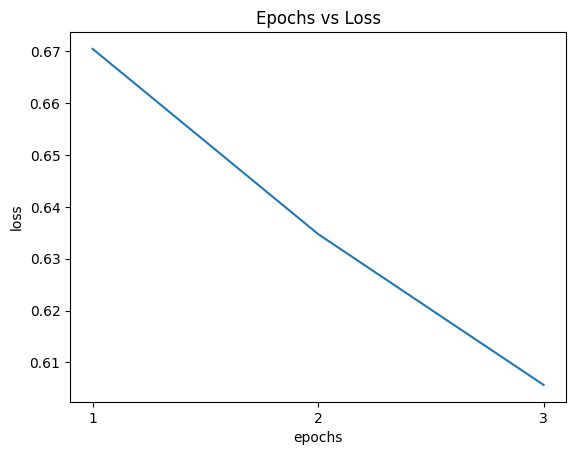

In [54]:
# lossPerEpoch
import matplotlib.pyplot as plt
lossItems = list()
for loss in lossPerEpoch:
    lossItems.append(loss.item())
lossItems = torch.tensor(lossItems)
epochs = torch.arange(len(lossItems))+1
print(epochs)
plt.plot(epochs,lossItems)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.xticks(range(1, len(lossItems) + 1))
plt.title('Epochs vs Loss')
plt.show()

In [42]:
import torch

filepath = '/kaggle/working/hateSpeechSTL.pth'

torch.save(model, filepath)

In [56]:
from IPython.display import FileLink
FileLink('hateSpeechSTL.pth')

/kaggle/working/hateSpeechSTL.pth